In [1]:
# Import des bibliothèques 
# Autograd & Numpy
import autograd
import autograd.numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] # [width, height] (inches). 

# Jupyter & IPython
from IPython.display import display

In [2]:
#Définition du gradient 
def grad(f):
    g = autograd.grad
    def grad_f(x, y):
        return np.array([g(f, 0)(x, y), g(f, 1)(x, y)])
    return grad_f

In [3]:
#Définition de la Jacobienne
def J(f):
    j = autograd.jacobian
    def J_f(x, y):
        return np.array([j(f, 0)(x, y), j(f, 1)(x, y)]).T
    return J_f

In [4]:
#Implémentation de display_contour 
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

### Fonctions quadratiques 

In [5]:
def f1(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return 3.0 * x1 * x1 - 2.0 * x1 * x2 + 3.0 * x2 * x2 

In [6]:
def f2(x1, x2):
    return (x1 - 1)**2 + (x1 - x2**2)**2

In [7]:
def f3(x, y):
    return np.sin(x + y) - np.cos(x * y) - 1 + 0.001 * (x * x + y * y) 

### Question 1

On a posé $c \in \mathbb{R}$, supposé la fonction $f:\mathbb{R}^2 \to \mathbb{R}$ continue, et telle que
$f(x_1, x_2) \to +\infty$ quand $\|(x_1,x_2)\| \to +\infty$.

Premièrement, l'ensemble de niveau $c$ de $f$ est un ensemble fermé car c'est l'image réciproque de l'ensemble fermé $\{c\}$ par une fonction continue. De plus, l'ensemble de niveau $c$ est borné donc c'est un compact car nous sommes en dimension finie. 

On a également l'équivalence entre les enoncés :

$(i)$ L'ensemble de niveau $c$ est non vide

$(ii)$ $c \ge  \underset{(x_1,x_2) \in \mathbb{R^{2}}}{\text{inf}} f(x_1,x_2)$ (Cette borne inférieure est atteinte.)



### Question 2
Au voisinage du point $x_0 = \begin{pmatrix} x_{10} \\x_{20}\\\end{pmatrix} \in \mathbb{R}^2$ où le gradient de $f$ ne s'annule pas, on pose :
$$
p(x_1, x_2) := \frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|} (x_1 - x_{10}) -
\frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|} (x_2 - x_{20}).
$$

On cherche à interpréter géométriquement cette fonction $p$.

On sait que le vecteur gradient évalué en $x_0$ $\nabla f(x_0)$ est normal à la courbe de niveau en $x_0$. Ainsi, on peut former une base orthonormée en posant un vecteur normal $\overrightarrow{n}$ et un vecteur tangent $\overrightarrow{\tau}$ à la courbe de niveau en $x_0$ de la manière suivante :

$$
\overrightarrow{n}=\frac{1}{\|\nabla f(x_0)\|}
\begin{pmatrix}
\partial_1 f(x_0) \\
 \partial_2 f(x_0)\\
\end{pmatrix}
$$

$$
\overrightarrow{\tau}=\frac{1}{\|\nabla f(x_0)\|}
\begin{pmatrix}
\partial_2 f(x_0) \\
 -\partial_1 f(x_0)\\
\end{pmatrix}
$$

On se préoccupe maintenant d'un vecteur $x=\begin{pmatrix} x_1 \\x_2\\\end{pmatrix}$. On remarque que $p(x)$ n'est rien d'autre que le produit scalaire entre le vecteur $x-x_0$ et le vecteur tangentiel $\overrightarrow{\tau}$. Autrement dit, $p(x)$ est la projection du vecteur $x-x_0$ sur la tangente à la courbe de niveau en $x_0$. En effet :

$$
\left\langle x-x_0  |  \overrightarrow{\tau} \right\rangle = \frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|} (x_1 - x_{10}) -
\frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|} (x_2 - x_{20})
$$

Et ainsi :

$$
p(x)=\left\langle x-x_0  |  \overrightarrow{\tau} \right\rangle
$$

In [8]:
### Implémentation python de la fonction p

def p(f,x10 ,x20 ,x1 ,x2 ):
    '''Implémentation Python de la fonction p.
    f : fonction en question
    x10, x20 : coordonnées du point x0
    x1, x2 : coordonnées d'évaluation de la fonction p'''
    grad_f = grad(f)
    gradx0= grad_f(x10,x20)
    d1=gradx0[0]
    d2=gradx0[1]
    norme=(d1*d1+d2*d2)**(1/2)
    return (d2*(x1-x10)/norme) - (d1*(x2-x20)/norme)

def affichage3d():
    fig=plt.figure()
    ax=fig.gca(projection='3d')
    x = np.linspace(-10,10.0,100)
    X, Y = np.meshgrid(x, x)
    Z = p(f1,1.0,1.0,X, Y)
    W = f1(X,Y)
    surf = ax.plot_surface(X,Y,Z)
    board = ax.plot_surface(X,Y,W)
    plt.show()


### Question 3
On pose:

$$
g : (x,t) \in  \mathbb{R^2}\times \mathbb{R} \mapsto \begin{pmatrix}
f(x) - c \\
p(x) - t
\end{pmatrix}\in \mathbb{R^2}
$$
 - g est continûment différentiable : 
$$ 
  J_g=\begin{pmatrix}
\partial_1 g_1 &\partial_2 g_1  & \partial_3 g_1  \\
 \partial_1 g_2& \partial_2 g_2 & \partial_3 g_2
\end{pmatrix}
= \begin{pmatrix}
\partial_1 f & \partial_2 f & 0 \\
 \frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|}& -\frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|}  & -1
\end{pmatrix}
$$
 Effectivement, les dérivées partielles de $g_1$ et $g_2$ existent et sont continue car $f$ est elle même continûment différentiable.


 - Inversibilité de $\partial_x g$:
 

$$
\partial_x g(x,t) = \begin{pmatrix}
\partial_1f &\partial_2f  \\
\frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|}& -\frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|} 
\end{pmatrix}
$$


D'où:


$$
det (\partial_x g(x,t)) = - \frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|}\partial_1f(x) - \frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|}\partial_2f(x)
$$

Donc :

$$
\forall t \in \mathbb{R}, det (\partial_x g(x_0,t))= - \|\nabla f(x_0)\| \neq 0
\
\
$$


Ainsi, par continuité du déterminant, il existe $Q$ un voisinage de $x_0$ dans lequel $\partial_x g(x,t)$ est inversible pour tout t. Ainsi, il existe un ouvert  $W = Q \times \mathbb{R}$, tel que $\partial_xg$ soit inversible. 

Par le théorème des fonctions implicites il existe donc des voisinages ouverts $U$ de $x_0$ et V de $0$ tel que $0 = p(x_0)$, tels que $U \times V \subset W$ et une unique fonction $\gamma : V \to \mathbb{R^2}$ continûment différentiable telle que $\forall t \in V$ et $\forall x \in U$ :


$$
g(x,t)=0 \Leftrightarrow 
x = \gamma (t) = \gamma(p(x))
$$

Nous obtenons donc qu'il existe un $\varepsilon > 0$ et une fonction (continûment différentiable) $\gamma :\left]-\varepsilon,\varepsilon \right[ \to \mathbb{R}^2$  ($\left]-\varepsilon,\varepsilon \right[$ est un voisinage de 0) tels que dans un voisinage ouvert de $x_0,$ :
$$
f(x_1,x_2) = c \Leftrightarrow  (x_1, x_2) = \gamma(t) \ où \ t = p(x_1, x_2)
$$



### Question 4

Il s'agit d'étudier le vecteur $\gamma'(t)$. L'application du théorème des fonctions implicites donnne également :

$$
\gamma'(t) = d\gamma (t) = - (\partial_x g(x,t))^{-1} \cdot \partial_t g(x,t)
$$

Les calculs précédants permettent alors d'écrire :

$$
\gamma'(t) = - \frac{1}{det(\partial_x g(x,t))}
\begin{pmatrix}
-\frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|} & -\partial_2 f(x) \\
- \frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|} & \partial_1 f(x) \\
\end{pmatrix}

\begin{pmatrix}
0 \\
-1 \\
\end{pmatrix}
$$

$$
\gamma'(t) = \frac{1}{det(\partial_x g(x,t))}
\begin{pmatrix}
-\partial_2 f(x) \\
\partial_1 f(x)  \\
\end{pmatrix}
$$

Comme le gradient de $f$ est non-nul dans voisinage de $x_0$, on en déduit que le vecteur $\gamma'(t)$ est non nul sur ce même voisinage, c'est à dire le voisinage $V=\left] -\varepsilon; \varepsilon\right[$ introduit à la question précédente. Par ailleurs, le vecteur $\gamma'(t)$ est proportionnel au vecteur $\overrightarrow{\tau}$ tangent à la courbe, et est donc orthogonal au vecteur gradient $\Delta f(x_0)$.


### Question 5

Nous pourrions choisir $\varepsilon$ en fonction de la valeur de la dérivée proche du zéro de la fonction. Effectivement, si la fonction a une pente très forte proche du zéro alors $\varepsilon$ doit être très faible car un petit écart entre le point déterminé et la solution exacte impliquera un grand écart entre $f$ et zéro. Inversement, si la dérivée est faible à l'approche de zéro un $\varepsilon$ relativement faible 
sera suffisant. Il faudrait alors raisonner par rapport à la dérivée de $f$ autour du zéro. 

Plus simplement, nous avons décidé de raisonner par rapport à la taille d'un pixel. En raisonnant sur notre ordinateur: la représentation de nos graphiques occupe une taille de de 14cm. L'écran de l'odinateur mesure 31cm et contient 1920 pixels. Le graphique contient donc $ \frac{1920 \times 14}{31} = 867$ pixels. D'où:

$$
\varepsilon_{min}= \frac{20}{867}=0.0231
$$

On choisit donc $\varepsilon = 0.02$

In [9]:
N = 100
eps = 0.02

### Tâche 1
Implémentation python de la recherche de zéro par méthode de Newton pour une fonction $F:\mathbb{R}^{2}\longrightarrow \mathbb{R}^{2}$

In [10]:
def Newton(F, x0, y0, eps=eps, N=N):
    x,y=x0,y0
    X=np.array([x,y])
    J_F = J(F)
    for i in range(N):
        inv = np.linalg.inv(J_F(x,y))
        X = X - inv.dot(F(x,y))
        x,y = X[0], X[1]
        if np.sqrt((x - x0)**2 + (y - y0)**2) <= eps:
            return x, y
        x0, y0 = x, y
    else:
        raise ValueError(f"no convergence in {N} steps.")

### Tâche 2

On définit la fonction: 

$$
f_{11} : (x_1,x_2) \in  \mathbb{R^2} \mapsto 
\begin{pmatrix}
f_1(x_1,x_2) \\x_1-x_2

\end{pmatrix}
$$

Lorsque $f$ s'annule, on a alors $x_1 = x_2$.

Représentons tout d'abord $f_1$ pour comprendre où sont les zéros de la fonction. 


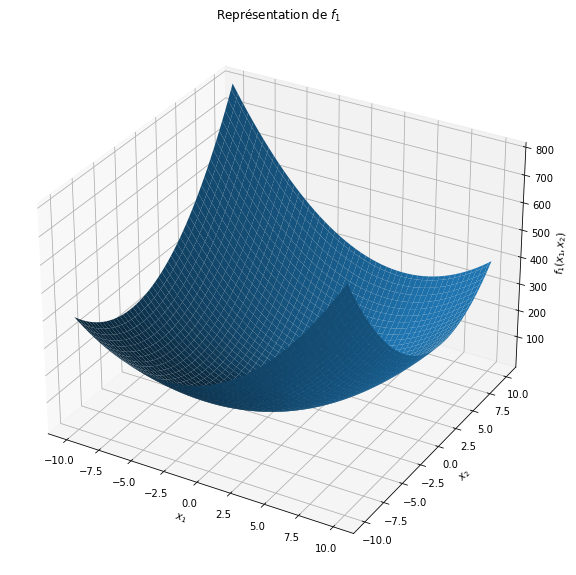

In [11]:
## Représentation de f_1
fig=plt.figure()
ax=fig.gca(projection='3d')
x = np.linspace(-10,10.0,100)
X, Y = np.meshgrid(x, x)
W = f1(X,Y)
courbe = ax.plot_surface(X,Y,W)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f_1(x_1,x_2)$')
ax.set_title('Représentation de $f_1$')
plt.show()

In [12]:
##Essais de la méthode de Newton 
def f11(x1,x2):
    f11 = np.array([f1(x1,x2), x1-x2])
    return f11

##Testons en prenant x_1=x_2=0.8
X = Newton(f11, 0.8, 0.8, eps = eps, N=N)
print (X)

(0.0125, 0.0125)


Text(0.5, 1.0, 'Variation du zéro de $f_1$ en fonction du point initial en imposant $x_1=x_2$')

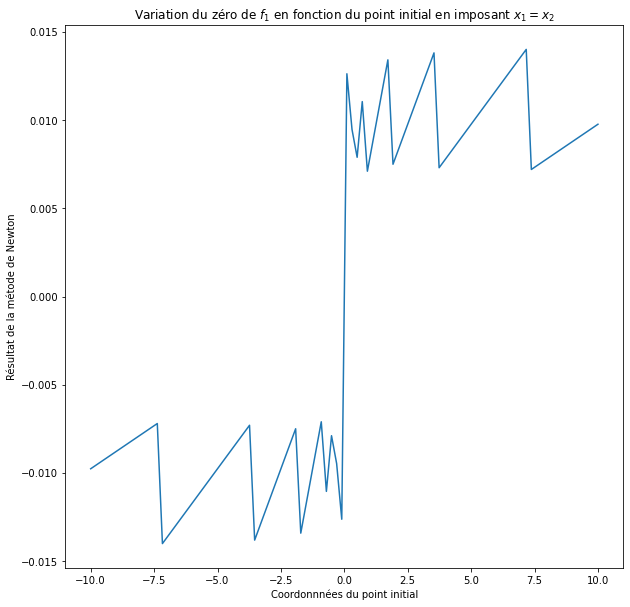

In [13]:
## Graphe montrant les variations de la solution en fonction du point initial 
x = np.linspace(-10,10.0,100)
y = []

for i in x:
    y.append(Newton(f11,i,i, eps=eps, N=N)[0])
plt.plot(x,y)
plt.xlabel('Coordonnnées du point initial')
plt.ylabel('Résultat de la métode de Newton')
plt.title('Variation du zéro de $f_1$ en fonction du point initial en imposant $x_1=x_2$')


Text(0.5, 1.0, 'Variation du zéro de $f_1$ en fonction de epsilon')

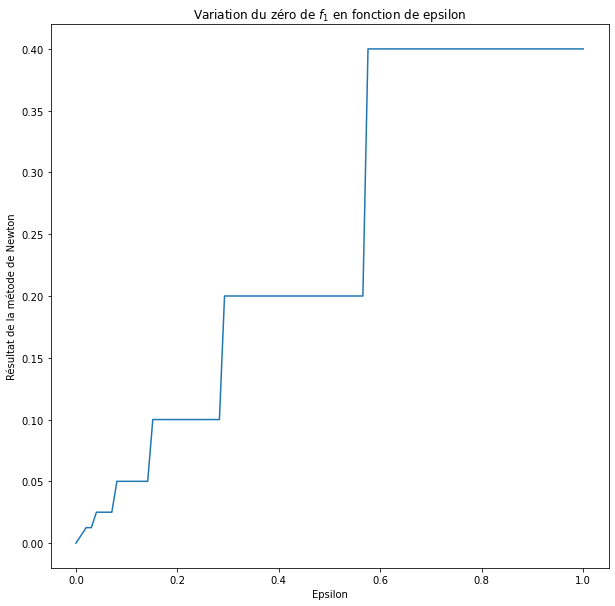

In [14]:
## Graphe montrant les variations de la solution en fonction de epsilon 
x = np.linspace(10**(-6),1,100)
y = []

for i in x:
    y.append(Newton(f11,0.8,0.8, eps=i, N=N)[0])
plt.plot(x,y)
plt.xlabel('Epsilon')
plt.ylabel('Résultat de la métode de Newton')
plt.title('Variation du zéro de $f_1$ en fonction de epsilon')

Text(0.5, 1.0, 'Variation du zéro de f_1 en fonction du point initial en imposant x_1**2-2*x_2=0')

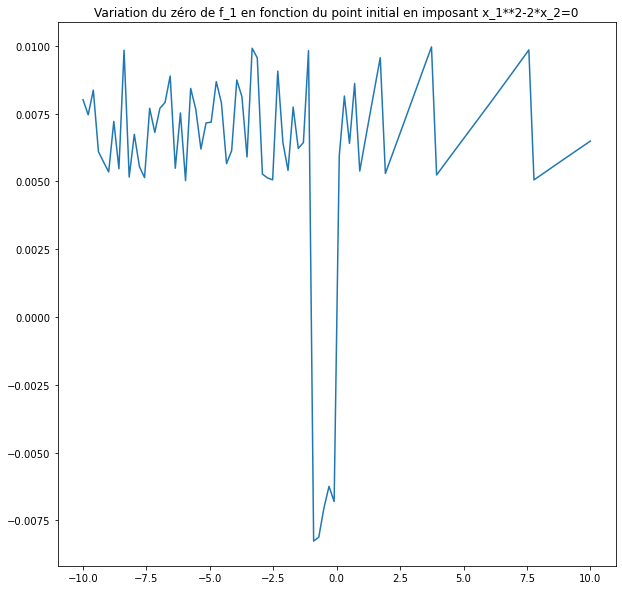

In [15]:
##Essais de la méthode de Newton 
def f11(x1,x2):
    f11 = np.array([f1(x1,x2), x1**2-2*x2])
    return f11
eps = 0.01

## Graphe montrant les variations de la solution en fonction du point initial 
x = np.linspace(-10,10.0,100)
y = []

for i in x:
    y.append(Newton(f11,i,i, eps=eps, N=N)[0])
plt.plot(x,y)
plt.title('Variation du zéro de f_1 en fonction du point initial en imposant x_1**2-2*x_2=0')



## Génération de points 

## Question 6



Ici, le but est d'introduire une fonction $F:\mathbb{R}^{2}\longrightarrow \mathbb{R}^{2}$ avec une contrainte permettant de se déplacer autour du point initial sur un cercle de rayon $\delta$. On pose donc :

$$
F:\begin{pmatrix}
x \\ y
\end{pmatrix}

\in \mathbb{R}^{2} \longmapsto 

\begin{pmatrix}
f(x,y)-c \\ (x-x_0)^2+(y-y_0)^2-\delta
\end{pmatrix}

\in \mathbb{R}^{2}
$$

In [16]:
c= 4

def level_curve(f, x0, y0, delta=0.1, N=1000, eps=eps):
    
    xi,yi=x0,y0
    L=[[xi,yi]]

    for k in range(N):

        def F(x1,x2):
            F = np.array([f(x1,x2)-c, (x1-xi)**2+(x2-yi)**2-delta**2])
            return F

        grad_f = grad(f)

        ## initialisation
        gradi=grad_f(xi,yi)
        d1,d2=gradi[0],gradi[1]
        x,y=xi+delta*d2/2,yi-delta*d1/2

        ## Méthode de Newton 
        X=np.array([x,y])
        xc,yc=x,y
        J_F = J(F)
        for i in range(100):
            inv = np.linalg.inv(J_F(x,y))
            X = X - inv.dot(F(x,y))
            x,y = X[0], X[1]
            if np.sqrt((x - xc)**2 + (y - yc)**2) <= eps:
                break
            xc, yc = x, y
        else:
            raise ValueError(f"no convergence in 100 steps.")

        xi,yi=x,y
        L.append([xi,yi])
    return L


len(level_curve(f1, 1.0 , 1.0 ,delta=0.1, N=1000, eps=eps))



1001

Test sur $f_1$


On superpose les résultats générés par level_curve et display_contour. Ils sont similaires pour la courbe de niveau considérée ($c=4=$), on ne les différencie donc pas.


On effectue de même pour $f_2$ et $f_3$.

In [17]:
##f1
#On trace notre résultat
res = level_curve(f1, 1.0 , 1.0 ,delta=0.1, N=100, eps=eps)
x1,y1=[],[]
for truc in res:
    x1+=[truc[0]]
    y1+=[truc[1]]

#On trace les ensembles de niveaux 
levels=10
x2=np.linspace(-1.5, 1.5, 100)
y2=np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x2, y2)
Z = f1(X, Y)
fig, ax = plt.subplots()
contour_set = plt.contour( X, Y, Z, colors="grey", linestyles="dashed", levels=levels, label='Résultat généré par display_contour')
ax.clabel(contour_set)
plt.grid(True)
plt.xlabel("$x_1$") 
plt.ylabel("$x_2$")
plt.gca().set_aspect("equal")
plt.plot(x1,y1, label='Résultat généré par level_curve')
plt.legend()
plt.title(f'Courbes de niveau de $f_1$')


##f3
#On trace notre résultat
res = level_curve(f3, 0.0 , 0.0 ,delta=0.1, N=100, eps=eps)
x1,y1=[],[]
for truc in res:
    x1+=[truc[0]]
    y1+=[truc[1]]

#On trace les ensembles de niveaux 
levels=10
x2=np.linspace(-1, 3, 100)
y2=np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x2, y2)
Z = f3(X, Y)
fig, ax = plt.subplots()
contour_set = plt.contour( X, Y, Z, colors="grey", linestyles="dashed", levels=levels)
ax.clabel(contour_set)
plt.grid(True)
plt.xlabel("$x_1$") 
plt.ylabel("$x_2$")
plt.gca().set_aspect("equal")
plt.plot(x1,y1, label='Résultat généré par level_curve')
plt.legend()
plt.title(f'Courbes de niveau de $f_3$')

ValueError: no convergence in 100 steps.

## Question 7 + tâche 4


Pour savoir si le segment produit par les deux derniers points intercecte le premier segment, nous allons calculer en quel point les deux droites portées par ces segments se coupent. Si ce point appartient au premier segment, il est alors nécessaire d'arrêter l'algorithme. Nous supposons donc que les deux droites se croisent nécessairement, ce qui nous semble une hypothèse raisonnable étant donné la situation et la précision informatique du calcul des coefficients directeurs des deux droites. 


Pour cela, nous écrivons deux sous-algorithmes: le premier calcul le coefficient directeur et l'ordonnée à l'origine de la droite, le second détermine si deux droites se coupent. 

In [102]:
## Algorithme qui calcul le coefficient directeur et l'ordonnée à l'origine d'une droite
def paramdroite(x1, y1, x2, y2):
    a=(y2-y1)/(x2-x1)
    b=y1- a*x1
    return (a,b)

## Algorithme qui indique si les deux droites se coupent en un point appartenant au premier segment 
def inter(X1, X2, X3, X4):
    a1,b1=paramdroite(X1[0], X1[1], X2[0], X2[1])
    a2,b2=paramdroite(X3[0], X3[1], X4[0], X4[1])
    inter=((b2-b1)/(a1-a2),a1*(b2-b1)/(a1-a2)+b1)
    if X1[0]<X2[0]:
        if X1[0] <= inter[0] <= X2[0]:
            if X1[1]<=X2[1]:
                return X1[1] <= inter[1] <= X2[1]
            else: 
                return X1[0] >= inter[0] >= X2[0]
        else: 
            return False
    else: 
        if X1[0] >= inter[0] >= X2[0]:
            if X1[1]<=X2[1]:
                return X1[1] <= inter[1] <= X2[1]
            else: 
                return X1[0] >= inter[0] >= X2[0]
        else: 
            return False


In [104]:
def test(L):
    if len(L)<4:
        return True
    else:
        return not inter(L[0], L[1], L[-2], L[-1])

c= 4

def level_curve2(f, x0, y0, delta=0.1, N=10, eps=eps):

    xi,yi=x0,y0
    L=[[xi,yi]]
    k=0
    while test(L) and k<N:
        k+=1
        def F(x1,x2):
            F = np.array([f(x1,x2)-c, (x1-xi)**2+(x2-yi)**2-delta**2])
            return F

        grad_f = grad(f)

        ## initialisation
        gradi=grad_f(xi,yi)
        d1,d2=gradi[0],gradi[1]
        x,y=xi+delta*d2/2,yi-delta*d1/2

        ## Méthode de Newton 
        X=np.array([x,y])
        xc,yc=x,y
        J_F = J(F)
        for i in range(100):
            inv = np.linalg.inv(J_F(x,y))
            X = X - inv.dot(F(x,y))
            x,y = X[0], X[1]
            if np.sqrt((x - xc)**2 + (y - yc)**2) <= eps:
                break
            xc, yc = x, y
        else:
            raise ValueError(f"no convergence in 100 steps.")

        xi,yi=x,y
        L.append([xi,yi])

    return L

print(len(level_curve2(f1, 1.0 , 1.0 ,delta=0.1, N=100, eps=eps)))



101


## Tâche 5

(1.097937743650272, 0.8871580635088139)
boucle1
(1.1299372927185318, 0.8502888142375484)
boucle1
(1.1615235408878837, 0.8138957621099794)
boucle1
(1.1927342290568936, 0.7779354228071873)
boucle1
(1.2236550137218076, 0.7423091046037029)
boucle1
(1.2544050588270124, 0.7068795091532161)
boucle1
(1.2851254498526394, 0.6714840805483158)
boucle1
(1.3159716762449691, 0.6359436669159015)
boucle1
(1.3471098271608628, 0.6000669036054116)
boucle1
(1.378715667847865, 0.5636512773654523)
boucle1
(1.4109758397606635, 0.5264817435932834)
boucle1
(1.4440906792380424, 0.48832747871083115)
boucle1
(1.4782784120356751, 0.44893704730673356)
boucle1
(1.5137807101241345, 0.4080319997032813)
boucle1
(1.5508698003982273, 0.3652986814417325)
boucle1
(1.589857518036585, 0.32037780217996414)
boucle1
(1.6311069335712376, 0.27285103921224385)
boucle1
(1.6750474942039644, 0.22222359194317987)
boucle1
(1.7221950646548363, 0.16790109121731978)
boucle1
(1.7731789195444305, 0.10915849922876619)
boucle1
(1.8287787726012

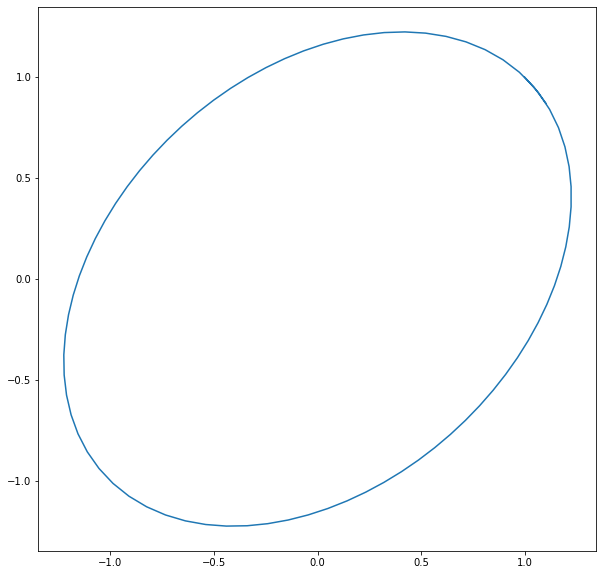

In [78]:
res = level_curve2(f1, 1.0 , 1.0 ,delta=0.1, N=78, eps=eps)
x,y=[],[]
for truc in res:
    x+=[truc[0]]
    y+=[truc[1]]
plt.plot(x,y)

## Question 8



On dispose de deux points $P_1=(x_1,y_1)$ et $P_2=(x_2,y_2)$ ainsi que de deux vecteurs $u_1=(u_{1x},u_{1y})$ et $u_2=(u_{2x}, u_{2y})$.

On cherche à produire un chemin $\gamma: [0,1] \to \mathbb{R}^2$ continûment différentiable, sous la forme $\gamma(t) = (x(t), y(t))$ où 
$ x(t) = a + bt + ct^2 $ et $y(t) = d + et + ft^2$, tel que : 

$$
\gamma(0) = (a,d) = P_1 = (x_1,y_1)
$$
$$
\gamma(1) = (a+b+c,d+e+f) = P_2 = (x_2,y_2)
$$
$$
\gamma'(0) = (b,e) \text{ colinéaire positivement à } u_1 : \left\{ \begin{array}{cl} u_{1y}b-u_{1x}e =0 \\ bu_{1x}+eu_{1y}>0 \end{array} \right.
$$
$$
\gamma'(1) = (b+2c, e+2f) \text{ colinéaire positivement à } u_2 : \left\{ \begin{array}{cl} u_{2y}(b+2c)-u_{2x}(e+2f) =0 \\ (b+2c)u_{2x}+(e+2f)u_{2y}>0 \end{array} \right.
$$


On obtient directement les valeurs de $a$ et $d$. Déterminer entièrement le chemin $\gamma$ revient à trouver les 4 inconnues restantes. On dispose de 4 équations mais également de deux contraintes supplémentaires de signe.

Focalisons-nous d'abord sur le système 4x4 sans les contraintes de signe. Il s'écrit :

$$
\left\{ \begin{array}{cl} b+c = x_2 - x_1 \\ e+f=y_2-y_1\\ u_{1y}b-u_{1x}e =0 \\ u_{2y}(b+2c)-u_{2x}(e+2f) = 0  \end{array} \right.
$$

De manière matricielle, on obtient :

$$
\begin{pmatrix}
1 & 1 & 0 & 0 \\
0 & 0 & 1 & 1 \\
u_{1y} & 0 & -u_{1x} & 0 \\
u_{2y} & 2u_{2y} & -u_{2x} & -2u_{2x}
\end{pmatrix}
\begin{pmatrix}
b \\
c \\
e \\
f
\end{pmatrix}
=
\begin{pmatrix}
x_2-x_1 \\
y_2 - y_1 \\
0 \\
0
\end{pmatrix}
$$

En calculant le déterminant $\Delta$ de la matrice carrée, on obtient :
$$
\Delta = u_{2y}u_{1x}-u_{1y}u_{2x}
$$
Ainsi, la matrice est inversible si et seulement si son déterminant est non-nul, c'est à dire si et seulement si les vecteurs $u_1$ et $u_2$ ne sont pas colinéaires. Dans ce cas, on obtient :

$$
\begin{pmatrix}
b \\
c \\
e \\
f
\end{pmatrix}
=
\frac{1}{u_{2y}u_{1x}-u_{1y}u_{2x}}
\begin{pmatrix}
2 u_{1x} u_{2y} & -2 u_{1x} u_{2x} & - u_{2x} & - u_{1x} \\
- u_{2x} u_{1y} - u_{1x} u_{2y} & 2 u_{1x} u_{2x} & u_{2x} & u_{1x} \\
2 u_{1y} u_{2y} & -2 u_{2x} u_{1y} & -u_{2y} & -u_{1y} \\
-2 u_{1y} u_{2y} & u_{2x} u_{1y} + u_{1x} u_{2y} & u_{2y} & u_{1y}
\end{pmatrix}
\begin{pmatrix}
x_2-x_1 \\
y_2 - y_1 \\
0 \\
0
\end{pmatrix}
$$

Un calcul matriciel donne ensuite un unique quadruplet $(b,c,e,f)$. Il s'agit ensuite de tester si ce quadruplet vérifie les conditions de signe. Si l'une des conditions de signe n'est pas vérifiée, aucune autre solution ne peut être trouvée.

In [18]:
def gamma(t, P1, P2, u1, u2):
    
    # Matrice à inverser
    M=np.array([[1,1,0,0],[0,0,1,1],[u2[1],0,-u1[0],0],[u2[1],2*u2[1],-u2[0],-2*u2[0]]])
    Det = u2[1]*u1[0]-u2[0]*u1[1]

    # Membre de droite
    Y=np.array([[P2[0]-P1[0]],[P2[1]-P1[1]],[],[]])

    # Si le déterminant est non-nul
    if Det > 0.0001 :
        M_inv = np.linalg.inv(M)
        BCEF = M_inv.dot(Y)

        # Conditions de signe
        if b*u1[0]+e*u1[1]>0 and (b+2*c)*u2[0]+(e+2*f)*u2[1]>0:
            a,d=P1[0],P1[1]
            b,c,e,f=BCEF[0],BCEF[1],BCEF[2],BCEF[3]
            
            # Calculs de x(t) et y(t)
            x=a+b*t+c*t*t
            y=d+e*t+f*t*t
            
            return (x,y)
        else :
            # Conditions de signe non vérifiées -> régression linéaire
            reglin(t, P1, P2)
    else :
        # Matrice non inversible -> régression linéaire
        reglin(t, P1, P2)

def reglin(t,P1,P2):
    x = P1[0]+(P2[0]-P1[0])*t
    y = P1[1]+(P2[1]-P1[1])*t
    return x,y
